In [7]:
import numpy as np
import matplotlib.pyplot as pp
import pandas as pd
import seaborn

# Interagency Grizzly Bear Study Team - Yellowstone Grizzly Bear Investigations

All of this data is from the <a href="https://igbconline.org/grizzly-bear-study-team/">Interagency Grizzly Bear Study Team (IGBST)</a>. These annual reports are summaries are the results of grizzly bear research and monitoring in the Great Yellowstone Ecosystem (GYE) by the Interagency Grizzly Bear Study Team. The annual reports start in 1997 and the most recently published report the investigation from 2022.

The first step of analyzing this data was taking screen shots of the tables found in "Bear Monitoring and Population Trend" specifically Table 1 and Table 3. Table 1 highlights all of the grizzly bears captured in the GYE for that year and consists of the bear's identification, sex, age, date it was captured, general location of the capture, capture, type, relase site, and which organization handled the capture. Table 3 highlights all of the bears radiomonitored, any offspring of note, and whether the radiomonitor is still opporational. To populate a data set I first needed to get the data into a csv file. I did this by taking screenshots of the table and using Excel to export the data from the screenshots. There was some manual cleanup and verifcation that needed to happen in Excel before being able to export it to a csv and explore the data more. This was a tedious process and was only done becuase I could not find an already available csv file of all the data that was included in the tables. I found that as the years went on Excel had a harder time converting the pictures of the tables to usable data so there was a lot of manual entry. Becuase of this there is clearly some room for human error, both on my side and becuase of the change of naming conventions in the data set. Most of this will be identified in the data exploration phase and get cleaned up in the data cleansing phase. 

Some of the basic cleanup done in Excel includes:
- Making sure Excel imports the data correctly from the images
- Making sure naming conventions are kept
    - 2018 IGBST uses the form *Removed (#209090)* for the **Release Site** column which is not used anywhere else. In fact there is no removal number after 2017
    - Sometimes the hyphen gets lost in *PY-WY*

The CSV files in this folder is the result of that initial cleanup.

## Data Exploration

First step is to explore our data set. First up the capture data from 2022-1997.

In [8]:
bearCapture = pd.read_csv('BearsCapture.csv')
bearCapture

,Bear,Sex,Age,Date,General Location,Capture type,Release Site,Handler,Year
0,1050,Male,Adult,4/25/22,"Greybull River, Pr-WY",Management,Removed (202203),WYGFD,2022
1,1059,Male,Adult,5/4/22,"South Fork Shoshone, Pr-WY",Management,Transported,WYGFD,2022
2,1060,Male,Adult,5/21/22,"Beam Gulch, SNF",Research,On site,WYGFD,2022
3,1061,Male,Adult,5/21/22,"Gravelbar Crk, SNF",Research,On site,WYGFD,2022
4,1061,Male,Adult,5/29/22,"Gravelbar Crk, SNF",Research,On site,WYGFD,2022
...,...,...,...,...,...,...,...,...,...
2511,83,F,19,10/16/87,"Canyon, YNP",Management,"Blacktail, YNP",IGBST/YNP,1987
2512,83,F,19,10/21/87,"Canyon, YNP",Management,Kill,IGBST/YNP,1987
2513,141,M,1,10/16/87,"Canyon, YNP",Management,"Big Horn Pass Trailhead, YNP",IGBST/YNP,1987
2514,142,M,6,10/21/87,"Indian Crk, YNP",NaN,On-site,IGBST,1987


In [9]:
bearCapture.columns

Index(['Bear', 'Sex', 'Age', ' Date ', 'General Location', 'Capture type',
       'Release Site', 'Handler', 'Year'],
      dtype='object')

In [10]:
bearCapture.isna().sum()

Bear                  2
Sex                   2
Age                   2
 Date                 0
General Location      1
Capture type        186
Release Site          0
Handler               1
Year                  0
dtype: int64

array([[<AxesSubplot:title={'center':'Year'}>]], dtype=object)

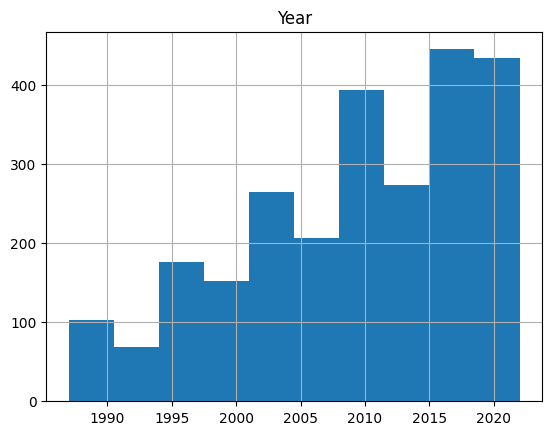

In [11]:
bearCapture.hist() #Shows amount of bears captured each year

In [12]:
pd.DataFrame(bearCapture['General Location'].value_counts())

,General Location
"Gibbon River, YNP",62
"Cascade Crk, YNP",55
"Antelope Crk, YNP",40
"Stephens Crk, YNP",38
"South Fork Shoshone, Pr-WY",38
...,...
"Deadman Bench, SNF",1
"West Fork Long Crk, SNF",1
"Bull Elk Crk, Pr-ID",1
"Pat O'Hara Crk, Pr.-WY",1


In [13]:
bearCapture[bearCapture['General Location']=='Carter crk, PR-WY'] # This should be replaces to have a Crk

,Bear,Sex,Age,Date,General Location,Capture type,Release Site,Handler,Year


<AxesSubplot:>

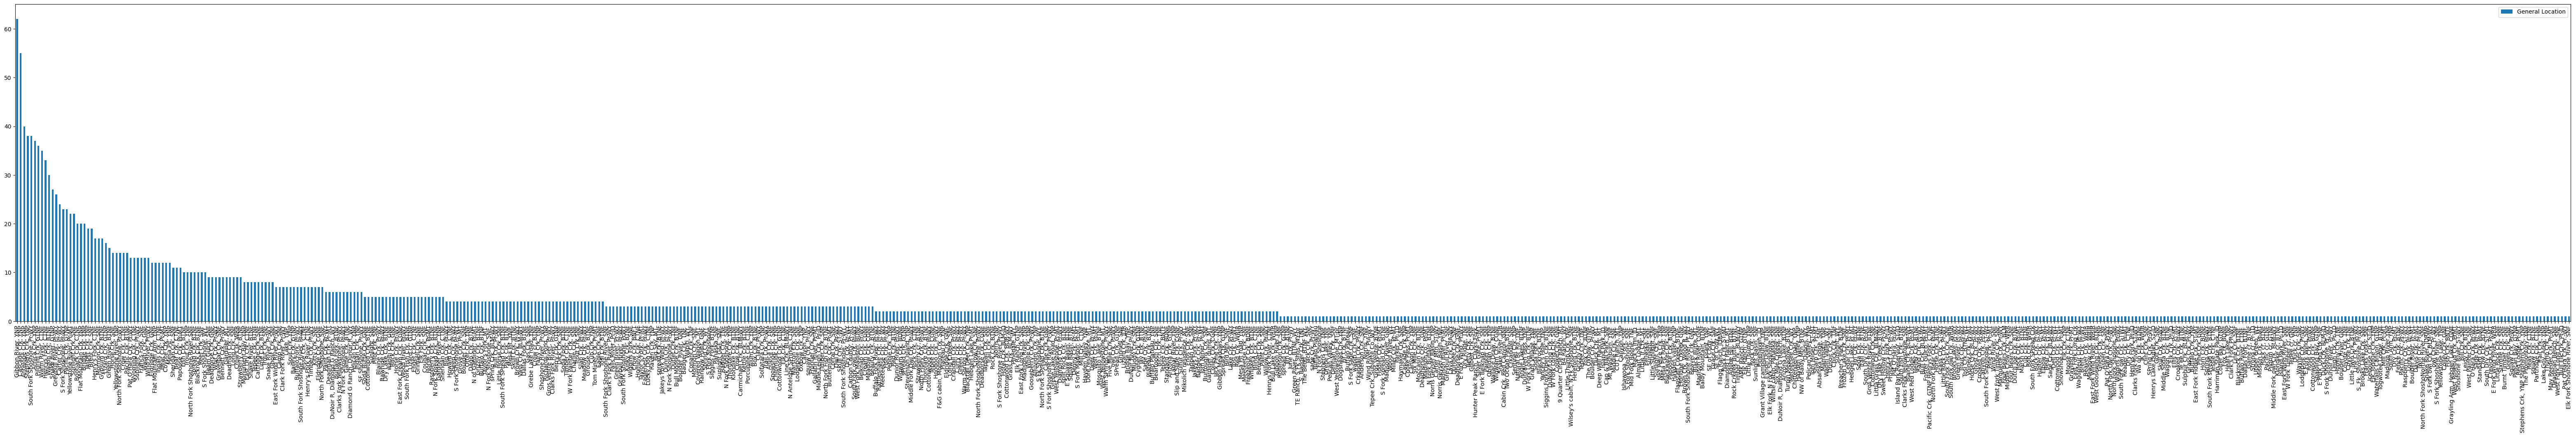

In [19]:
pd.DataFrame(bearCapture['General Location'].value_counts()).plot(kind='bar', figsize=(80,10))

There are a lot of different locations and some of them are because of differences in naming convetions, i.e. crk vs CRK. This should be cleaned up especially since there are places that have only one or two bear captures.

<AxesSubplot:>

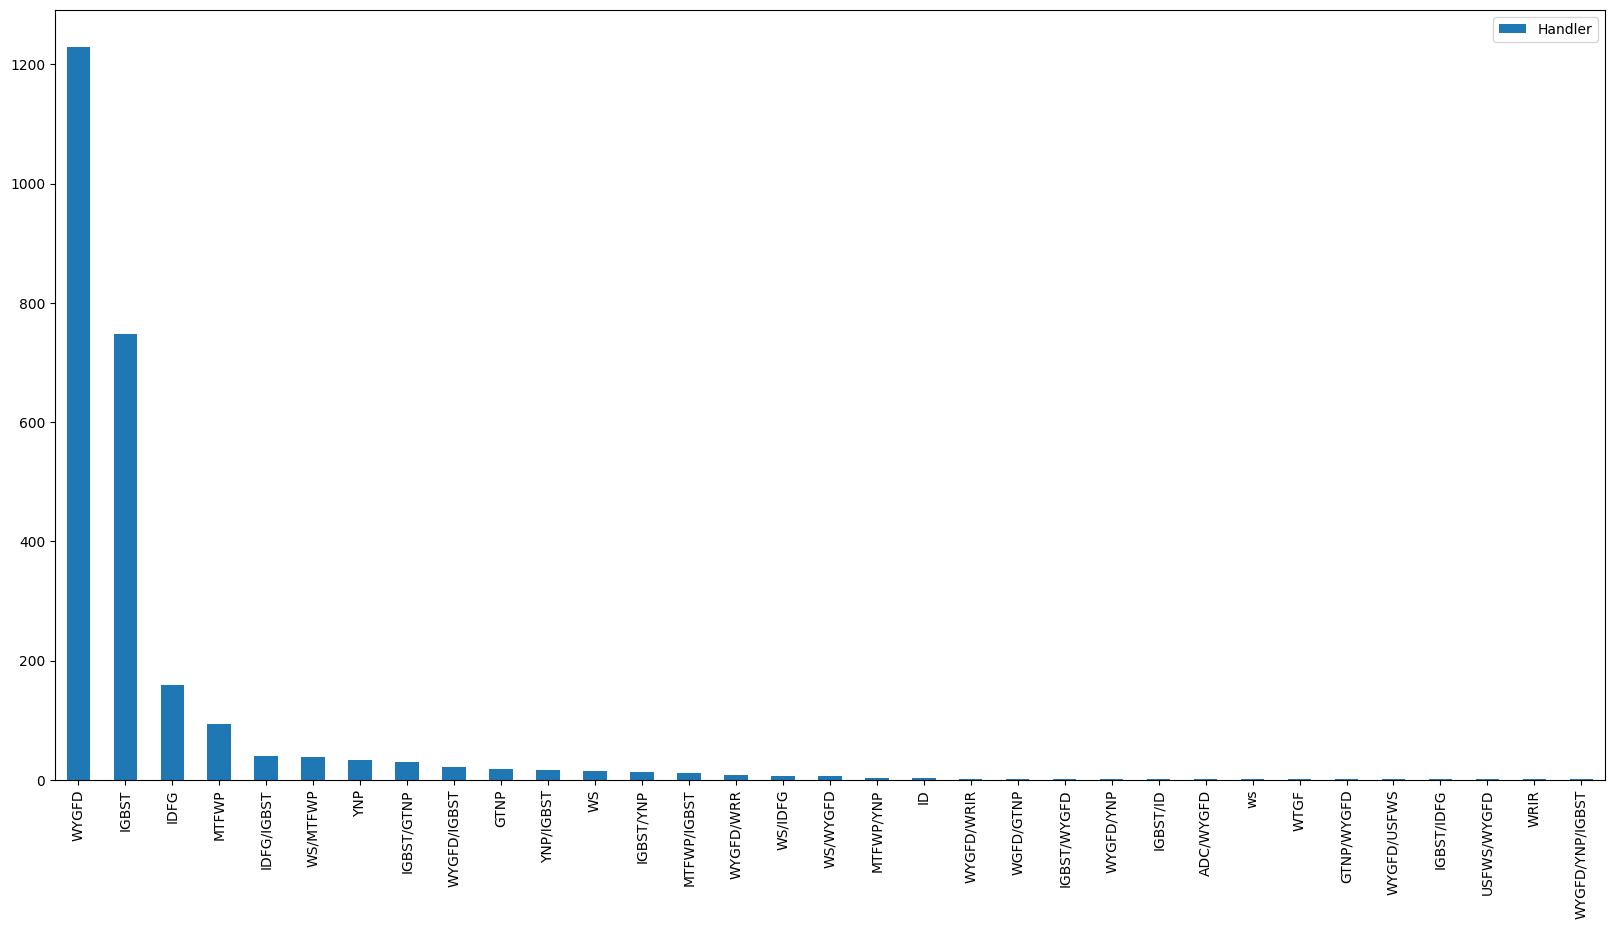

In [15]:
pd.DataFrame(bearCapture['Handler'].value_counts()).plot(kind='bar', figsize=(20,10))

In [16]:
pd.DataFrame(bearCapture['Handler'].value_counts())

,Handler
WYGFD,1230
IGBST,748
IDFG,160
MTFWP,93
IDFG/IGBST,40
WS/MTFWP,39
YNP,33
IGBST/GTNP,30
WYGFD/IGBST,22
GTNP,18


- ws should be WS
- WTGF should be WYGFD

In [24]:
threshold = 1
counts = pd.DataFrame(bearCapture['Handler'].value_counts())

mask = bearCapture.isin(counts[counts == threshold].index)
result = bearCapture[mask]

print(result)

     Bear  Sex  Age  Date  General Location Capture type Release Site  \
0     NaN  NaN  NaN    NaN              NaN          NaN          NaN   
1     NaN  NaN  NaN    NaN              NaN          NaN          NaN   
2     NaN  NaN  NaN    NaN              NaN          NaN          NaN   
3     NaN  NaN  NaN    NaN              NaN          NaN          NaN   
4     NaN  NaN  NaN    NaN              NaN          NaN          NaN   
...   ...  ...  ...    ...              ...          ...          ...   
2511  NaN  NaN  NaN    NaN              NaN          NaN          NaN   
2512  NaN  NaN  NaN    NaN              NaN          NaN          NaN   
2513  NaN  NaN  NaN    NaN              NaN          NaN          NaN   
2514  NaN  NaN  NaN    NaN              NaN          NaN          NaN   
2515  NaN  NaN  NaN    NaN              NaN          NaN          NaN   

        Handler  Year  
0         WYGFD   NaN  
1         WYGFD   NaN  
2         WYGFD   NaN  
3         WYGFD   NaN  
4  

In [28]:
bearCapture[bearCapture['Handler']=='WRIR']

,Bear,Sex,Age,Date,General Location,Capture type,Release Site,Handler,Year
509,Unm11,Female,Adult,8/9/18,"JK Crk, WRIR",Management,Removed (201833),WRIR,2018


In [18]:
bearCapture[bearCapture['Handler']=='YNP']

,Bear,Sex,Age,Date,General Location,Capture type,Release Site,Handler,Year
652,516,Male,Adult,10/2/17,"Oxbow Crk, YNP",Research,On site,YNP,2017
773,804,Male,Subadult,5/8/15,"Oxbow Crk, YNP",Research,On site,YNP,2015
824,Unm5,Female,Adult,8/8/15,"Yellowstone River, YNP",Management,Removed,YNP,2015
825,Unm6,Female,Subadult,8/10/15,"Yellowstone River, YNP",Management,Removed,YNP,2015
826,Unm7,Female,Subadult,8/9/15,"Yellowstone River, YNP",Management,Removed,YNP,2015
827,Unm5,Female,Adult,8/8/15,"Yellowstone River, YNP",Management,Removed,YNP,2015
828,Unm6,Female,Subadult,8/10/15,"Yellowstone River, YNP",Management,Removed,YNP,2015
829,Unm7,Female,Subadult,8/9/15,"Yellowstone River, YNP",Management,Removed,YNP,2015
1183,Unm,Male,Subadult,8/1/11,"Bridge Crk, YNP",Management,Removed,YNP,2011
1232,Umm,Male,subadult,9/29/11,"Sour Crk, YNP",Management,Removed,YNP,2011


In [29]:
pd.DataFrame(bearCapture['Year'].value_counts())

,Year
2018,129
2021,123
2020,113
2010,111
2015,109
2016,108
2011,107
2012,104
2022,100
2017,99


In [34]:
wygfdCapture = bearCapture[bearCapture["Handler"] == "WYGFD"]
wygfdCapture

,Bear,Sex,Age,Date,General Location,Capture type,Release Site,Handler,Year
0,1050,Male,Adult,4/25/22,"Greybull River, Pr-WY",Management,Removed (202203),WYGFD,2022
1,1059,Male,Adult,5/4/22,"South Fork Shoshone, Pr-WY",Management,Transported,WYGFD,2022
2,1060,Male,Adult,5/21/22,"Beam Gulch, SNF",Research,On site,WYGFD,2022
3,1061,Male,Adult,5/21/22,"Gravelbar Crk, SNF",Research,On site,WYGFD,2022
4,1061,Male,Adult,5/29/22,"Gravelbar Crk, SNF",Research,On site,WYGFD,2022
...,...,...,...,...,...,...,...,...,...
2469,117,F,5,7/24/88,"Sunlight, SNF",NaN,On-site,WYGFD,1988
2470,117,F,5,7/28/88,"Sunlight, SNF",NaN,On-site,WYGFD,1988
2471,117,F,5,9/25/88,"Sunlight, SNF",NaN,On-site,WYGFD,1988
2483,160,M,5,9/13/88,"S Fork Shoshone, SNF",Management,On-site,WYGFD,1988


In [35]:
pd.DataFrame(wygfdCapture['Year'].value_counts())

,Year
2018,74
2010,71
2021,69
2012,66
2016,59
2015,58
2020,54
2009,53
2017,50
2013,49


In [36]:
pd.DataFrame(wygfdCapture['General Location'].value_counts())

,General Location
"South Fork Shoshone, Pr-WY",38
"Wagon Crk, BTNF",30
"Greybull River, Pr-WY",26
"Carter Crk, Pr-WY",24
"S Fork Shoshone, Pr-WY",23
...,...
"Middle Crow Crk, WRR",1
"Warm SPrings Crk, Pr-WY",1
"Wind River, SNF",1
"South Fork Shoshone, ST-WY",1


In [41]:
sForkShoshoneCapture = bearCapture[bearCapture["General Location"] == "South Fork Shoshone, Pr-WY"]
sForkShoshoneCapture

,Bear,Sex,Age,Date,General Location,Capture type,Release Site,Handler,Year
1,1059,Male,Adult,5/4/22,"South Fork Shoshone, Pr-WY",Management,Transported,WYGFD,2022
86,Unm202216,Male,Adult,10/5/22,"South Fork Shoshone, Pr-WY",Management,Removed (202239),WYGFD,2022
226,987,Male,Adult,5/7/20,"South Fork Shoshone, Pr-WY",Management,Transported,WYGFD,2020
229,988,Male,Subadult,5/17/20,"South Fork Shoshone, Pr-WY",Management,Transported,WYGFD,2020
291,Unm202013,Female,Subadult,8/2/20,"South Fork Shoshone, Pr-WY",Management,Removed (202020),WYGFD,2020
327,Unm202019,Male,Subadult,9/29/20,"South Fork Shoshone, Pr-WY",Management,Removed (202036),WYGFD,2020
336,697,Male,Adult,3/31/19,"South Fork Shoshone, Pr-WY",Management,Removed (201901),WYGFD,2019
436,921,Male,Subadult,9/1/18,"South Fork Shoshone, Pr-WY",Management,Removed (201836),WYGFD,2018
510,944,Male,Subadult,8/17/18,"South Fork Shoshone, Pr-WY",Management,Transported,WYGFD,2018
519,Unm12,Male,Adult,9/4/18,"South Fork Shoshone, Pr-WY",Management,Removed (201839),WYGFD,2018


In [42]:
pd.DataFrame(sForkShoshoneCapture['Handler'].value_counts())

,Handler
WYGFD,38
